In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, recall_score, precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


To create a neural network classification model using this heart disease dataset, you can follow these steps. I'll guide you through data preprocessing, neural network setup, and training. Since you have both numeric and categorical features, we'll use a `ColumnTransformer` to preprocess them.

### 1. Preprocessing the Data


In [2]:



heart_data = pd.read_csv('../data/raw/heart.csv')
# Define features and target variable
X = heart_data.drop(columns='HeartDisease')
y = heart_data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# Preprocessing pipeline
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### 2. Building the Neural Network


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Include input shape for the first layer
    Dropout(0.2),  # Dropout layer
    Dense(64, activation='relu'),  # Second dense layer
    Dropout(0.2),  # Dropout layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 0.6034 - accuracy: 0.7002 - val_loss: 0.4956 - val_accuracy: 0.8027
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.8024 - val_loss: 0.4072 - val_accuracy: 0.8571
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.8348 - val_loss: 0.3677 - val_accuracy: 0.8639
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8296 - val_loss: 0.3543 - val_accuracy: 0.8707
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8569 - val_loss: 0.3504 - val_accuracy: 0.8707
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3729 - accuracy: 0.8348 - val_loss: 0.3528 - val_accuracy: 0.8571
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3450 - accuracy: 0.8569 - val_loss: 0.3500 - val_accuracy: 0.8571
Epoch 8/100


In [4]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9185


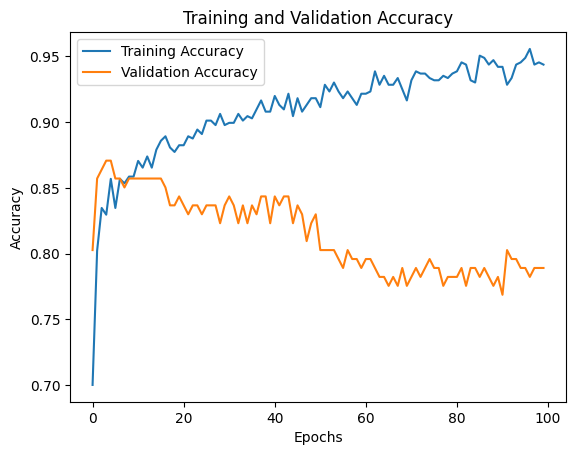

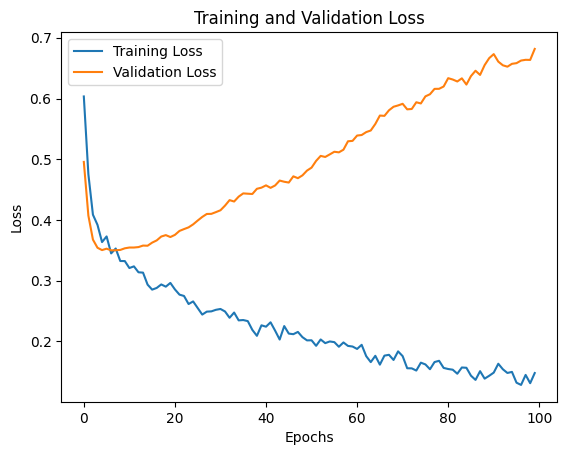

In [5]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### 3. Evaluating the Model

In [6]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

6/6 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9185
Test accuracy: 0.92


---
---

### **Additional Considerations** 

- **Early Stopping**: To prevent overfitting add an early stopping callback.
- **Hyperparameter Tuning**: Adjusting the number of layers, neurons, learning rate, etc., could improve model performance.

In [7]:
import keras_tuner as kt
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Include input shape for the first layer
    Dropout(0.2),  # Dropout layer
    Dense(64, activation='relu'),  # Second dense layer
    Dropout(0.2),  # Dropout layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

early_stopping = EarlyStopping(
    monitor='val_loss',       # Stop if the validation loss does not improve
    patience=10,              # Wait for 10 epochs without improvement
    restore_best_weights=True # Revert to the best weights after stopping
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=100,               # Set a high max epoch count, early stopping will handle actual stopping
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping] # Pass the early stopping callback
)



Epoch 1/100
19/19 [==============================] - 1s 9ms/step - loss: 0.6391 - accuracy: 0.6014 - val_loss: 0.5450 - val_accuracy: 0.7755
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.8007 - val_loss: 0.4335 - val_accuracy: 0.8503
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8416 - val_loss: 0.3753 - val_accuracy: 0.8776
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8382 - val_loss: 0.3515 - val_accuracy: 0.8844
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.8501 - val_loss: 0.3427 - val_accuracy: 0.8844
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8467 - val_loss: 0.3343 - val_accuracy: 0.8844
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3590 - accuracy: 0.8467 - val_loss: 0.3317 - val_accuracy: 0.8844
Epoch 8/100
1

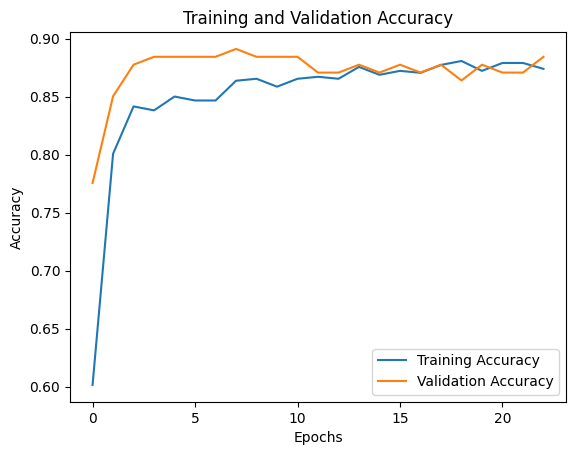

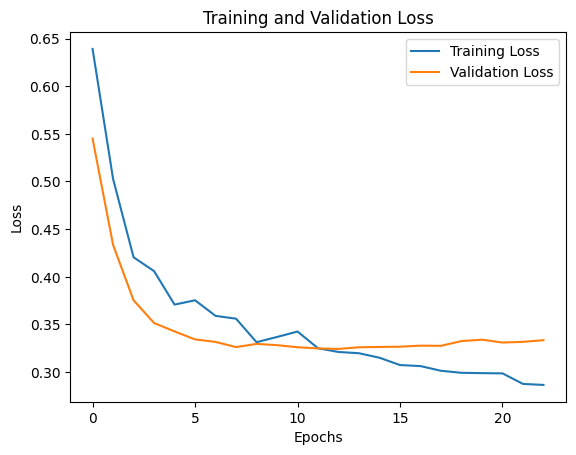

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9130
